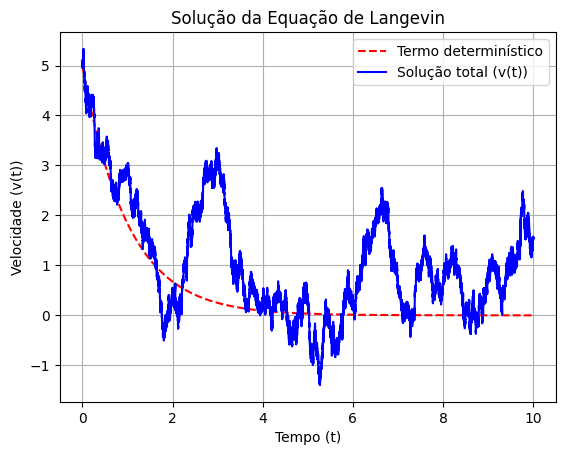

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
m = 1.0          # Massa
alpha = 1.0      # Coeficiente de atrito
kBT = 1.0        # Temperatura térmica (k_B T)
v0 = 5.0         # Velocidade inicial
N = 100000         # Número de passos
t_final = 10.0   # Tempo final
dt = t_final / N # Tamanho do passo
t = np.linspace(0, t_final, N)

# Incrementos do processo de Wiener (ruído)
dW = np.sqrt(2 * alpha * kBT * dt) * np.random.randn(N)

# Termo determinístico
v_det = v0 * np.exp(-(alpha/m) * t)

# Termo estocástico (integral recursiva)
I = np.zeros(N)
for n in range(1, N):
    I[n] = np.exp(-(alpha/m) * dt) * I[n-1] + (1/m) * dW[n-1]

# Solução total
v = v_det + I

# Plot
plt.plot(t, v_det, 'r--', label='Termo determinístico')
plt.plot(t, v, 'b-', label='Solução total (v(t))')
plt.xlabel("Tempo (t)")
plt.ylabel("Velocidade (v(t))")
plt.title("Solução da Equação de Langevin")
plt.legend()
plt.grid(True)
plt.show()